In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

import sys
sys.path.append("..")
from contour_visualization import hierarchic_blending_operator
from contour_visualization import color_converter
from contour_visualization import color_operations
from contour_visualization import color_schemes
from contour_visualization import picture_plot
from contour_visualization import picture_contours
from contour_visualization import helper
from contour_visualization import picture_grid
from contour_visualization import example_data

12:41:58.232 WARNING :: Using NumPy C-API based implementation for BLAS functions.


In [3]:
import logging

In [4]:
# For autotesting
%load_ext autoreload
%autoreload 2

In [5]:
width = 9.5
height = 9.5
plt.rcParams['figure.figsize'] = [width, height]

In [6]:
size = 200

In [7]:
use_c_implementation = True

### Statischer Gaussian

In [8]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 5,5
gaussian_static = [x_min, x_max, y_min, y_max, [mu_x,mu_y], [[variance_x, 0], [0, variance_y]], size]

In [9]:
colorschemes = color_schemes.get_colorbrewer_schemes()
backgroundcolorscheme = color_schemes.get_background_colorbrewer_scheme()

In [8]:
gaussians_2 = example_data.generate_four_moving_gaussians(size=1000)

11:00:30.985 INFO :: [-10, 10, -10, 10, [1 1], [[5 0]
 [0 5]], 1, 1000] 
 [-10, 10, -10, 10, [-1 -1], [[5 0]
 [0 5]], 1, 1000] 
 [-10, 10, -10, 10, [ 1 -1], [[5 0]
 [0 5]], 1, 1000] 
 [-10, 10, -10, 10, [-1  1], [[5 0]
 [0 5]], 1, 1000]
11:00:31.265 INFO :: [-10, 10, -10, 10, [2 2], [[5 0]
 [0 5]], 1, 1000] 
 [-10, 10, -10, 10, [-2 -2], [[5 0]
 [0 5]], 1, 1000] 
 [-10, 10, -10, 10, [ 2 -2], [[5 0]
 [0 5]], 1, 1000] 
 [-10, 10, -10, 10, [-2  2], [[5 0]
 [0 5]], 1, 1000]
11:00:31.537 INFO :: [-10, 10, -10, 10, [3 3], [[5 0]
 [0 5]], 1, 1000] 
 [-10, 10, -10, 10, [-3 -3], [[5 0]
 [0 5]], 1, 1000] 
 [-10, 10, -10, 10, [ 3 -3], [[5 0]
 [0 5]], 1, 1000] 
 [-10, 10, -10, 10, [-3  3], [[5 0]
 [0 5]], 1, 1000]
11:00:31.810 INFO :: [-10, 10, -10, 10, [4 4], [[5 0]
 [0 5]], 1, 1000] 
 [-10, 10, -10, 10, [-4 -4], [[5 0]
 [0 5]], 1, 1000] 
 [-10, 10, -10, 10, [ 4 -4], [[5 0]
 [0 5]], 1, 1000] 
 [-10, 10, -10, 10, [-4  4], [[5 0]
 [0 5]], 1, 1000]
11:00:32.086 INFO :: [-10, 10, -10, 10, [5 5], [[5 0

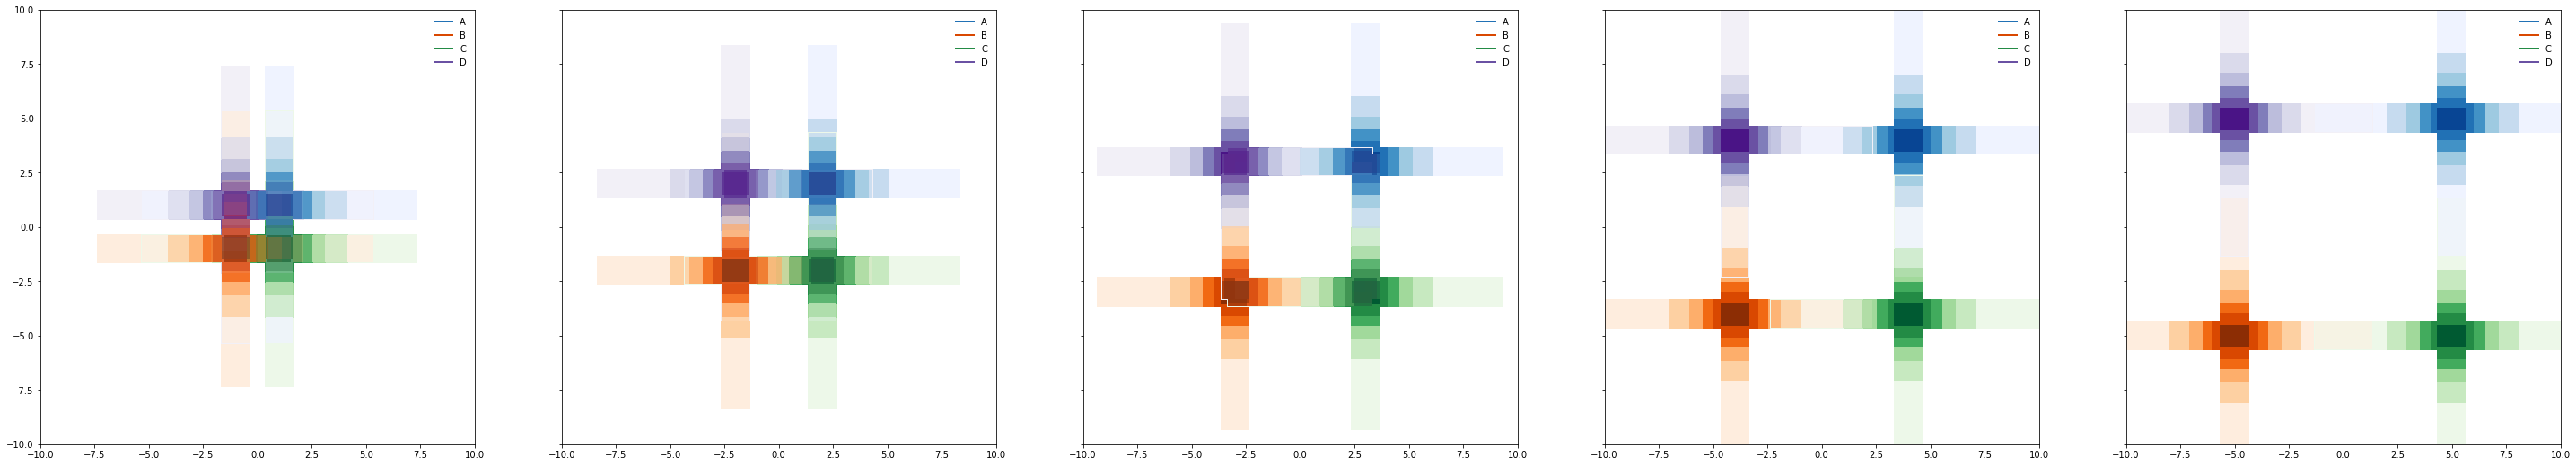

In [85]:
picture_plot.plot_images(gaussians_2, crosses=True)

In [9]:
width = 19.5
height = 19.5
plt.rcParams['figure.figsize'] = [width, height]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 25
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.labelsize'] = 25
plt.rcParams["legend.loc"] = "upper right"

In [10]:
%autoreload 2

In [15]:
gaussians_example = example_data.generate_four_random_gaussians(size=100)

In [12]:
gaussians_example[23][0].size

1000

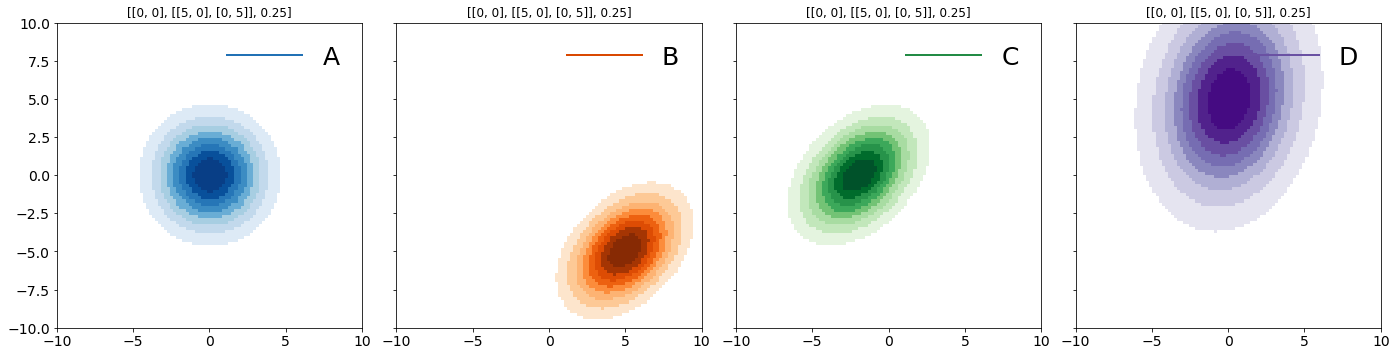

In [37]:
picture_grid.plot_image(gaussians_example[23])
plt.tight_layout()
plt.savefig("row_plot.png")

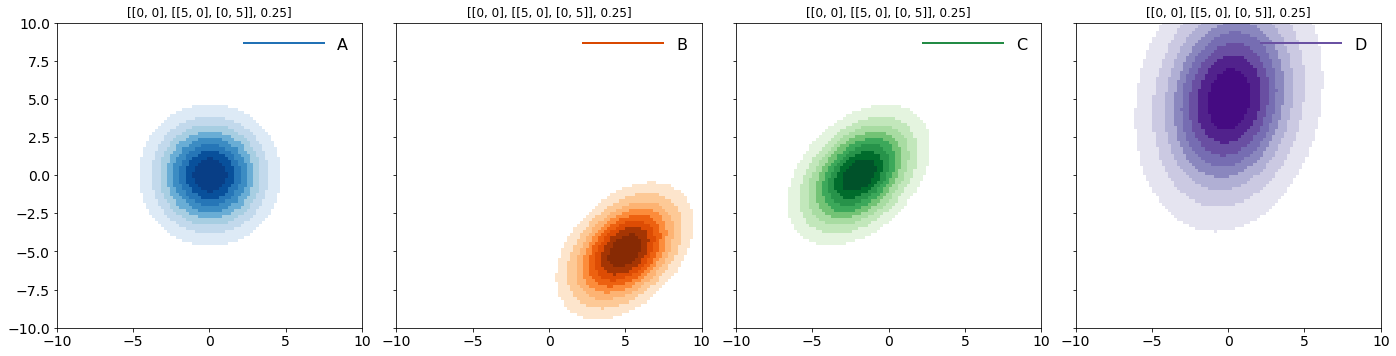

In [16]:
picture_grid.plot_image(gaussians_example[23])
plt.tight_layout()
plt.savefig("row_plot.png")

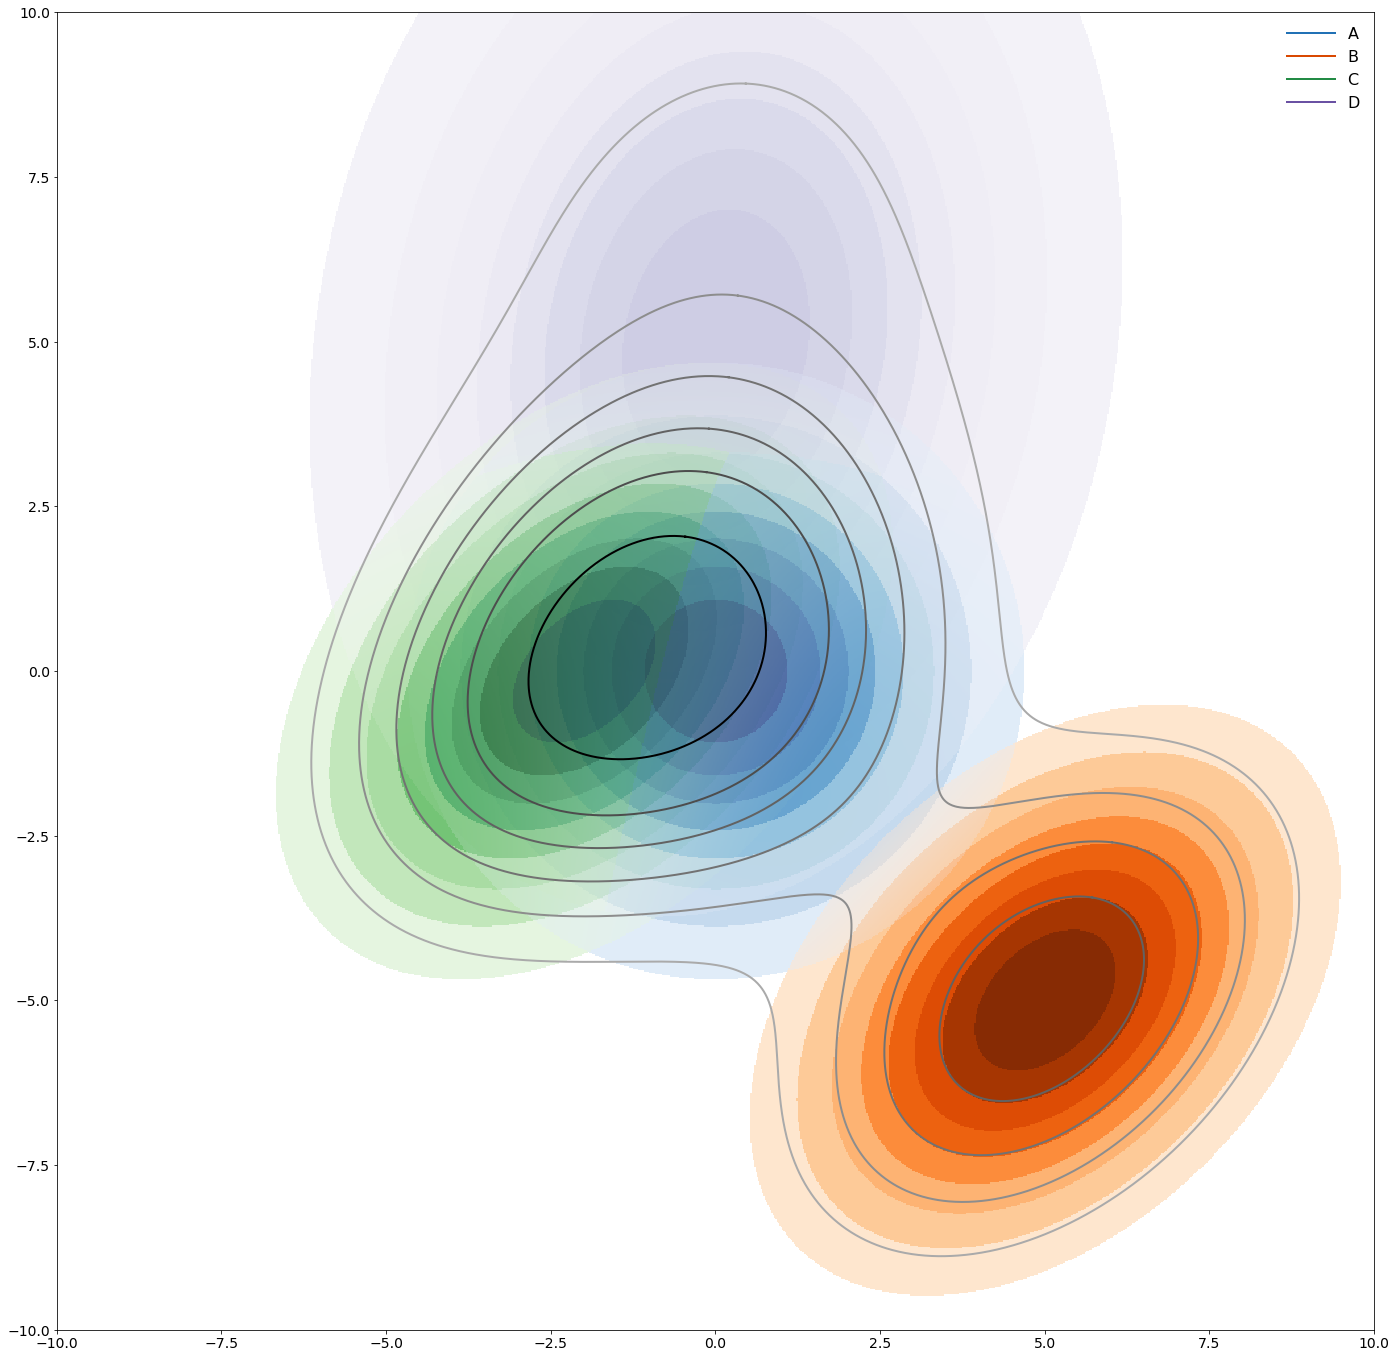

In [125]:
picture_plot.plot_images(gaussians_example[23:24], contours=True, contour_lines=True)
plt.tight_layout()
plt.savefig("joint_plot.png")

In [10]:
gaussians_example = example_data.generate_four_random_gaussians(size=100)

In [11]:
width = 19.5
height = 19.5
plt.rcParams['figure.figsize'] = [width, height]
plt.rcParams["xtick.major.bottom"] = False
plt.rcParams["ytick.minor.left"] = False
plt.rcParams['legend.fontsize'] = 25
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.labelsize'] = 25
plt.rcParams["legend.loc"] = "upper right"

In [12]:
logger = logging.getLogger("contour_visualization.picture_cross")

In [13]:
logger.setLevel(logging.INFO)

In [14]:
new_gau  =gaussians_example[23:24][0]

([(105409, -63245), (-51746, -63245), (-51746, 63245), (105409, 63245)],)
[(51746, -51746), (63244, -51746), (63244, 51746), (51746, 51746), (51746, 63244), (-51746, 63244), (-51746, 51746), (-63244, 51746), (-63244, -51746), (-51746, -51746), (-51746, -63244), (51746, -63244)]
([(51746, -63245), (-105409, -63245), (-105409, 63245), (51746, 63245)],)
[(51746, -51746), (63244, -51746), (63244, 51746), (51746, 51746), (51746, 63244), (-51746, 63244), (-51746, 51746), (-63244, 51746), (-63244, -51746), (-51746, -51746), (-51746, -63244), (51746, -63244)]
([(63245, -105409), (63245, 51746), (-63245, 51746), (-63245, -105409)],)
[(51746, -51746), (63244, -51746), (63244, 51746), (51746, 51746), (51746, 63244), (-51746, 63244), (-51746, 51746), (-63244, 51746), (-63244, -51746), (-51746, -51746), (-51746, -63244), (51746, -63244)]
([(63245, -51746), (63245, 105409), (-63245, 105409), (-63245, -51746)],)
[(51746, -51746), (63244, -51746), (63244, 51746), (51746, 51746), (51746, 63244), (-5174

ValueError: setting an array element with a sequence.

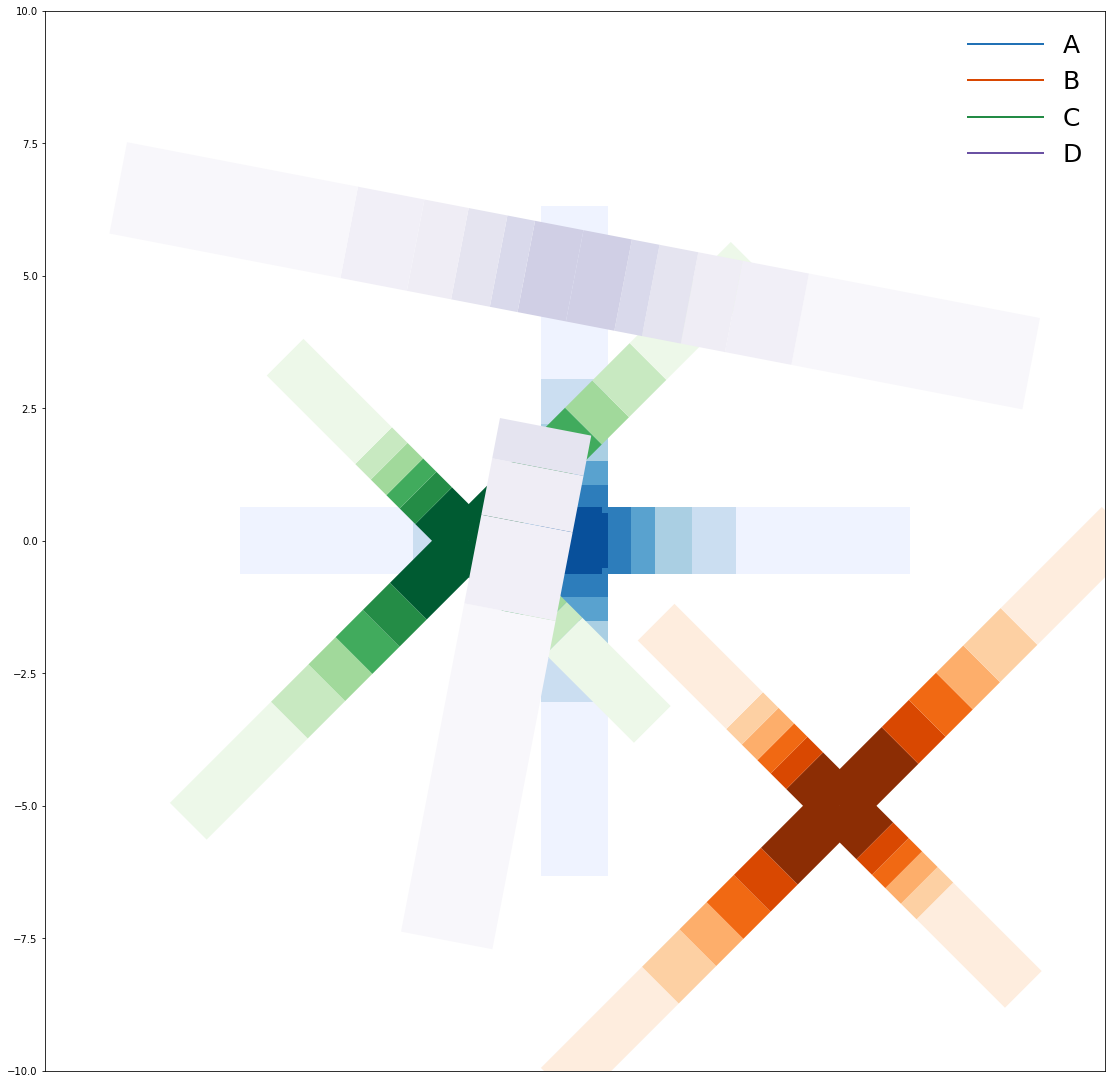

In [83]:
picture_plot.plot_images([new_gau,], crosses=True, contour_lines=True)
plt.tight_layout()
plt.savefig("joint_plot.png")

[(1.02706, 5.69535), (1.23443, 6.77213), (-0.48798, 7.10383), (1.23442, 6.77213)]
okay:[[(1.23443, 6.77213), (-0.48798, 7.10383), (1.23442, 6.77213), (1.02706, 5.69535)]]
[(-2.79206, -1.48488), (-3.48488, -0.79206), (-3.998, -1.30518), (-3.30518, -1.998)]
okay:[[(-2.79206, -1.48488), (-2.91948, -1.35746), (-3.30518, -1.998)]]


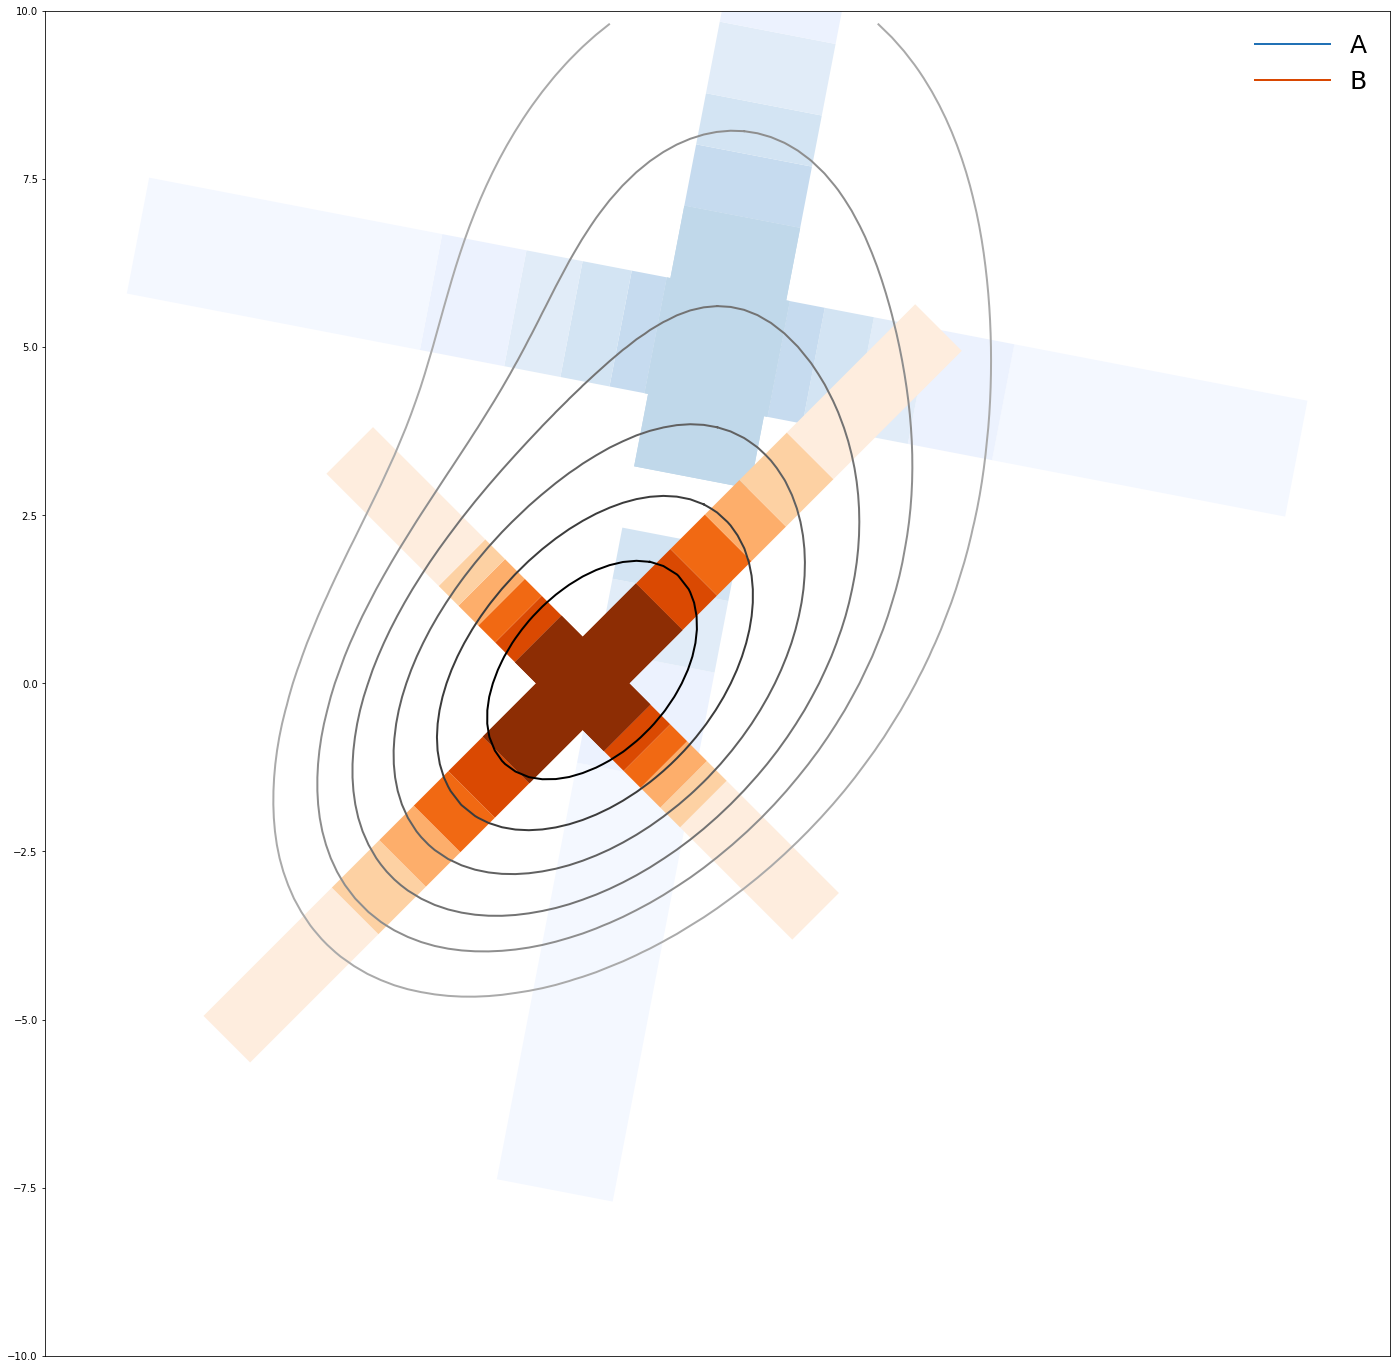

In [121]:
picture_plot.plot_images([[new_gau[3],new_gau[2]]], fill=False, crosses=True, contour_lines=True)
plt.tight_layout()
#  
plt.savefig("joint_plot.png")